## Выявление закономерностей, определяющих успешность компьютерных игр

### Описание проекта

Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.
Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

### Цели исследования:

1. Обзор данных и предообработка.
2. Исследовательский анализ:
    - оценить выпуск игр для различных платформ по годам и определитьактуальный период для проведения исследования;
    - проанализировать продажи для различных платформ;
    - оценить влияние отзывов пользователей и критиков для самой популярной платфомы платформы;
    - проанализировать жанры игр, какое влияние они оказывают на продажи.
3. Составить портрет пользователя каждого региона:
    - определить топ-5 популярных платформ для каждого региона;
    - определить топ-5 популярных жанров;
    - проанализировать, влияет ли рейтинг ESRB на продажи в отдельном регионе.
4. Проверка гипотез:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### 1. Предообработка данных

**Откроем файл с данными и изучим общую информацию**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('games.csv')

In [3]:
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выводы:**

- Необходимо скорректировать название столбцов с использованием только строчных букв.
- Проверить пропущенные значение

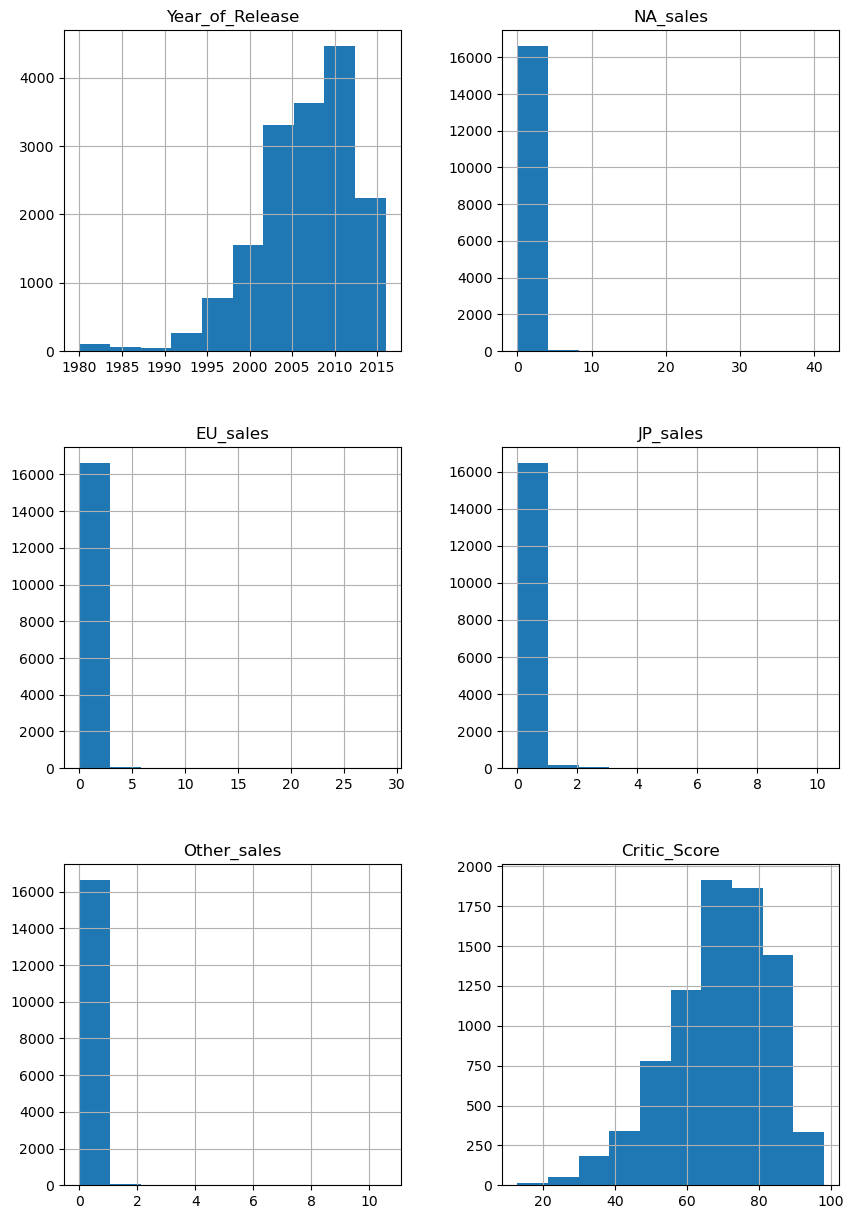

In [5]:
data.hist(figsize=(10, 15))
plt.show()

**Выводы:**
- На гистограмме видно, что игр с годом выпуска до 1990 включительно очень мало и можем их отбросить, как аномальные.
- Аномальные значения продаж
   - в Северной Америки для значений больше 4 миллионов копий
   - в Японии для значений более 1 миллиона копий
   - в других странах более 1 миллиона копий
- Для рейтинга крититиков ниже 30 также наблюдаются аномальные значения.

Эти данные необходимо удалить и проверить, чтобы их количество не превышало 10%.


**Проверим названия столбцов и исправим их при необходимости.**

In [6]:
print(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [7]:
data = data.rename(
    columns = {
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)

In [8]:
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


**Рассмотрим пропущенные значения и посчитаем их.**

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В названии пропущено два значения, так как возможности для их заполнения не вижу и на общем объеме данных это не отразится, то удалим их.

In [10]:
data = data.dropna(subset=['name'])

В 'year_of_release' тоже немного пропусков и их можем удалить.
Если бы пропусов было много, то можно было найти данные в других источниках.

In [11]:
data = data.dropna(subset=['year_of_release'])

In [12]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Рассмотрим уникальные значения в 'user_score'

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть значения 'tbd' - это сокращение от 'to be determined' и означает 'будет определено'.
Заменим их на NaN.

In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Преобразуем типы данных:**
- в 'year_of_release' в формат datetime и выгрузим год
- в 'user_score' в float, там как указан рейтинг, который не является целочисленными значениями

In [17]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year

In [18]:
data['user_score'] = data['user_score'].astype(float)

In [19]:
data.info() #проверим тип данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


В столбцах user_score и critic_score пропущенных значений достаточно много, поэтому удалить эти строки не можем. Промаркируем их как -1

In [20]:
data['user_score'] = data['user_score'].fillna(-1)

In [21]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Рассмотрим уникальные значения в столбце 'rating'

In [23]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [24]:
data[data['rating'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN


Заполним пропуски в 'rating' как неизвестны - unknown 

In [25]:
data['rating'] = data['rating'].fillna('unknown')

Проверим датафрейм после замен и удаления пропусков

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [28]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


### 2. Исследовательский анализ данных

Посчитаем сколько игр выпускалось в разные годы, сгруппировав по годам. Построим гистограмму для наглядности.

In [29]:
year_grouped = data.groupby('year_of_release').agg({'name': 'count'})

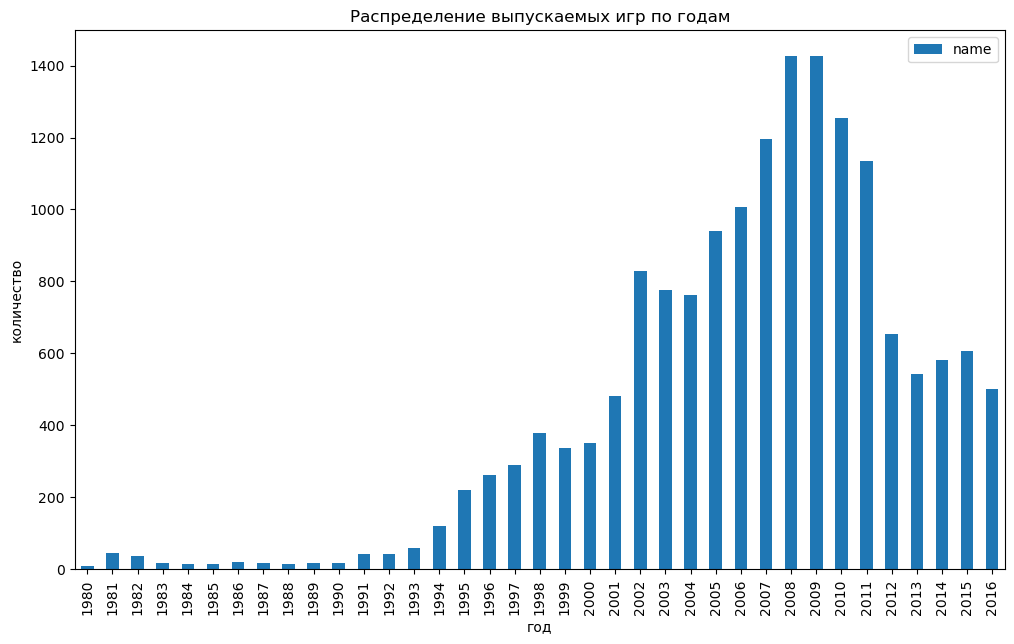

In [30]:
year_grouped.plot(kind='bar', figsize=(12, 7))
plt.title("Распределение выпускаемых игр по годам")
plt.xlabel("год")
plt.ylabel("количество")
plt.show()

**Вывод**

На графике видно:
   - максимальное количество игр было выпущено в 2008 и 2009 годах
   - основное количество выпущенных игр распределено с 2001 по 2016 год
   - количество игр до 1994 года минимальное и можем отбросить эти значения, как аномалии.

In [31]:
data = data[data['year_of_release'] >= 1994]

Рассмотрим, как продажи менялись по платформам.

In [32]:
platform_grouped = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False)

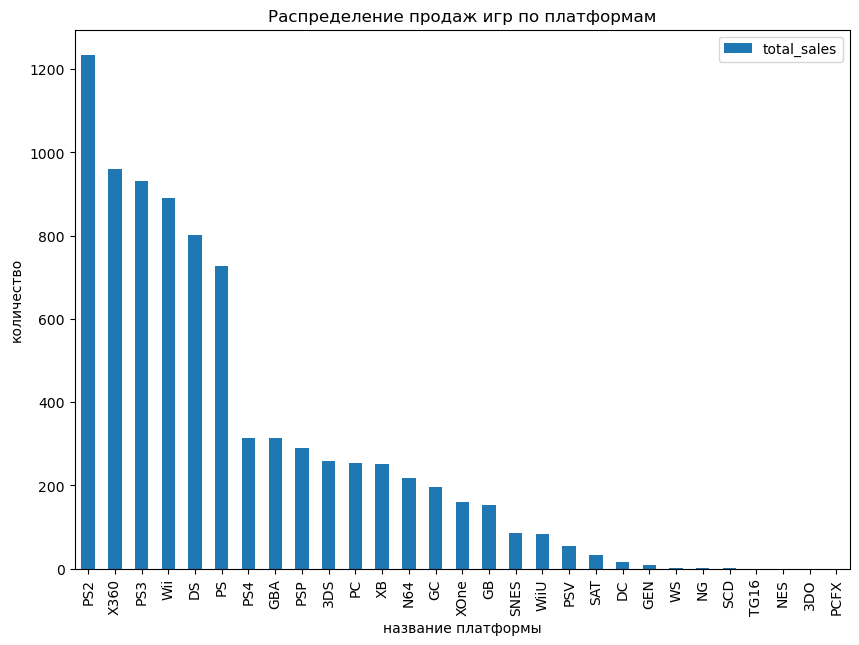

In [33]:
platform_grouped.plot(kind='bar', figsize=(10, 7))
plt.title("Распределение продаж игр по платформам")
plt.xlabel("название платформы")
plt.ylabel("количество")
plt.show()

Выделим топ-10 платформ с максимальными продажами

In [34]:
platform_top10 = platform_grouped.sort_values(by='total_sales', ascending = False)[:10]

In [35]:
platform_top10

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


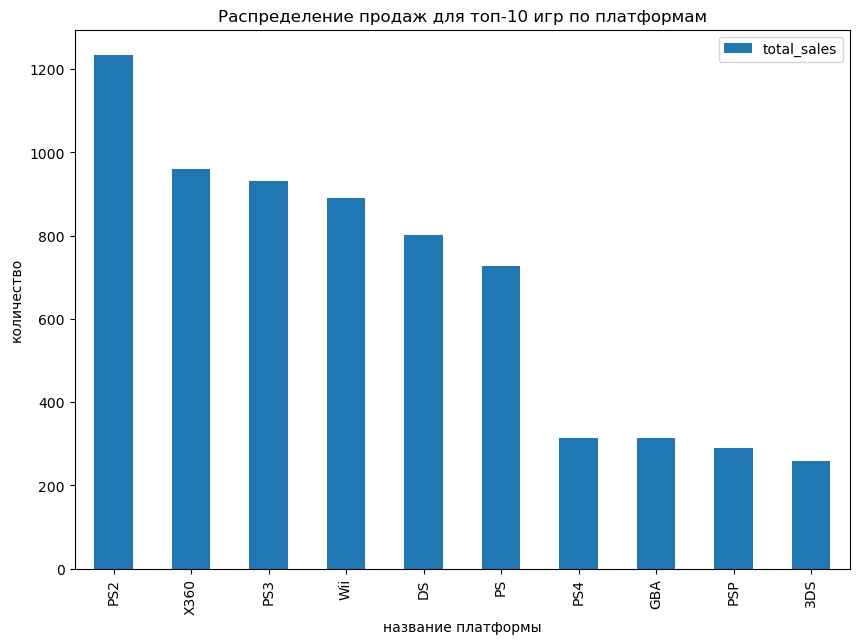

In [36]:
platform_top10.plot(kind='bar', figsize=(10, 7))
plt.title("Распределение продаж для топ-10 игр по платформам")
plt.xlabel("название платформы")
plt.ylabel("количество")
plt.show()

Создадим таблицу для всех платформ и выведем графики для топ-10 платформ в период основных выпусков с 2001 по 2016 (включительно)

In [37]:
platform_table = data.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

In [38]:
platform_table

,platform,year_of_release,total_sales
0,3DO,1994,0.02
1,3DO,1995,0.08
2,3DS,2011,63.20
3,3DS,2012,51.36
4,3DS,2013,56.57
...,...,...,...
192,XB,2008,0.18
193,XOne,2013,18.96
194,XOne,2014,54.07
195,XOne,2015,60.14


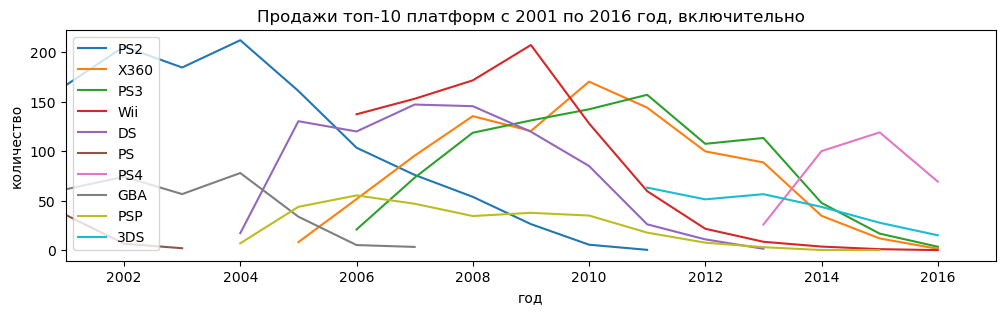

In [39]:
fig, ax = plt.subplots(figsize=(12,3))
for i in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']:
    (platform_table[platform_table['platform'] == i]).plot('year_of_release', 'total_sales', ax=ax)
ax.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'])
ax.set_xlim([2001, 2017])
plt.title("Продажи топ-10 платформ с 2001 по 2016 год, включительно")
plt.xlabel("год")
plt.ylabel("количество")
plt.show()

**Вывод**

На графике видно, что в период с 2004 по 2006 появилось 5 новых платформы и просуществовали до 2016 года. За это время появилось две новые платформы в 2011 и 2013 году.
Таким образом считаем, что в среднем платформы живут от 10 до 12 лет, а новые платформы появляются каждые 5-7 лет.
Актуальным периодом будет промежуток между 2013 годом и 2016 годом.

Возьмем данные за соответствующий актуальный период с 2013 по 2016 год, включительно.

In [40]:
data_actual = data[(data['year_of_release'] >= 2013) & (data['year_of_release'] <= 2016)]

In [41]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


Сформируем таблицу для периода с 2013 года по 2016 год

In [42]:
data_actual_table = data_actual.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()

In [43]:
data_actual_table

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.38
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25


In [44]:
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


Построим диаграммы продаж игр, вышедших в актуальный период с 2013 года по 2016 год для топ-10 платформ. При этом часть платформ GBA, PS, DS, PS2 - устаревшие и им на смету пришли новые, поэтому их тоже отсекаем.

In [45]:
platform = ['3DS', 'PS4', 'PSP','DS','Wii','WiiU', 'PS3','X360']

3DS


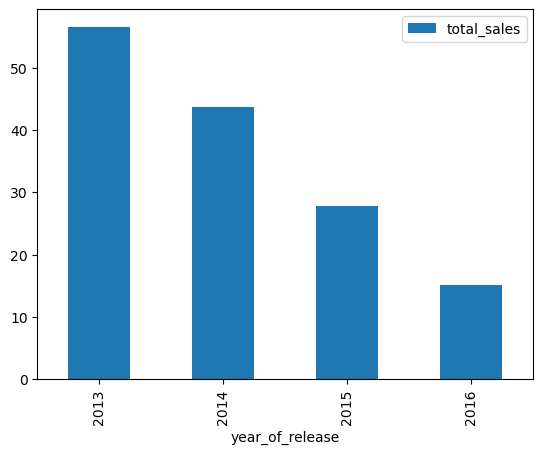

PS4


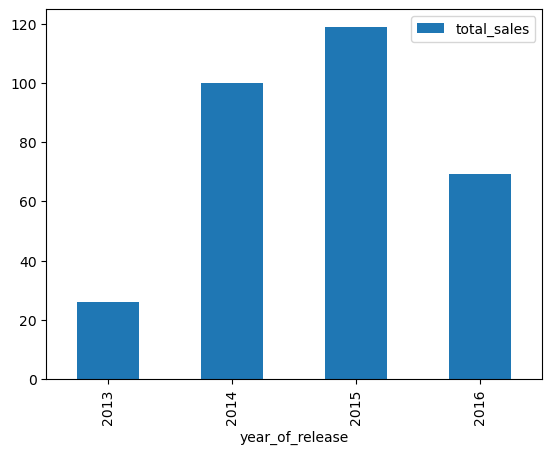

PSP


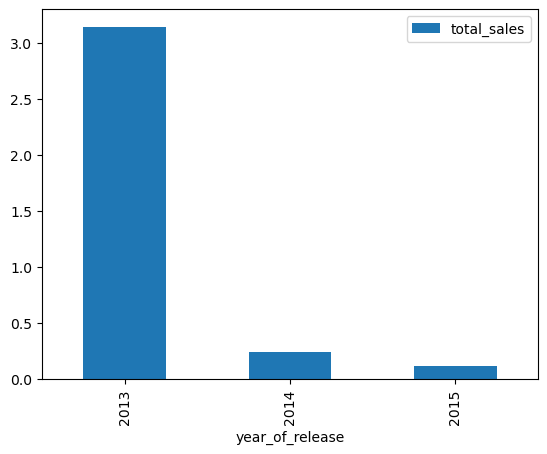

DS


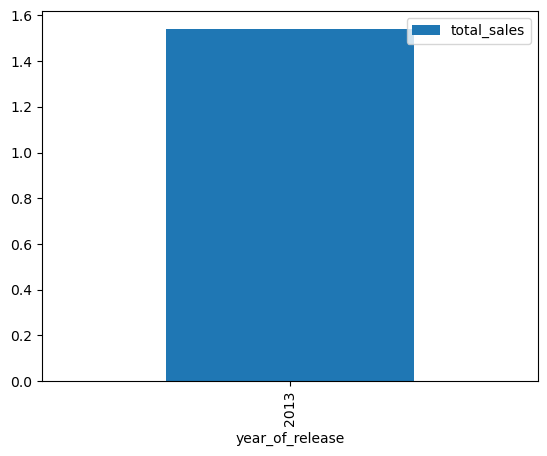

Wii


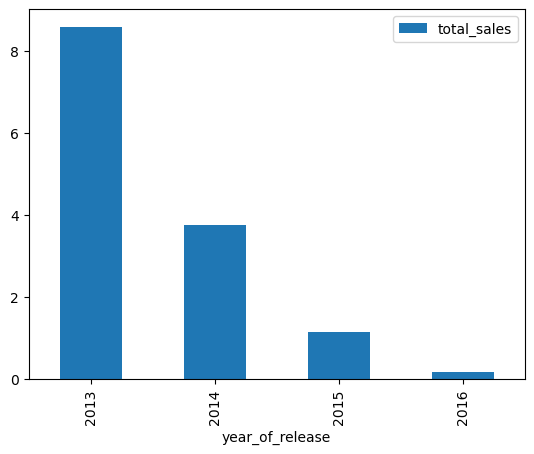

WiiU


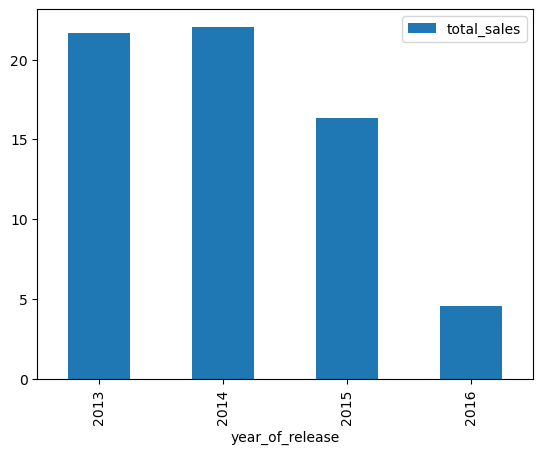

PS3


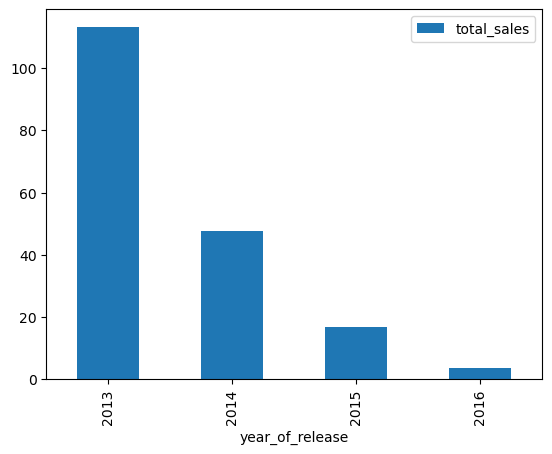

X360


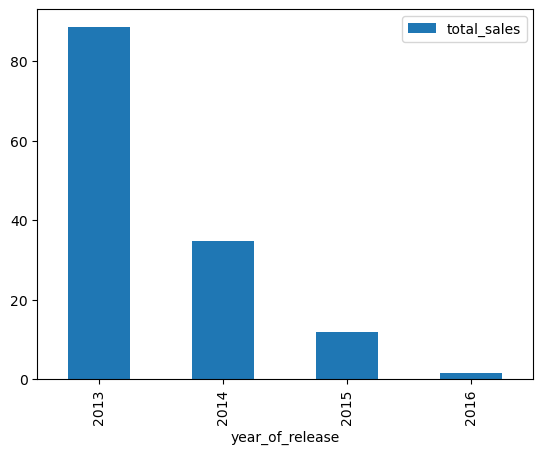

In [46]:
for platform in platform:
    print(platform)
    (data_actual
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

Как видно из графиков для платформы PS4 наблюдается рост продаж с 2013 года по 2015 года, а в 2016 продажи снизились, но они были максимальными относительно других платформ.
Для всех остальных плаформ начиная с 2013 года происходило снижение продаж, поэтому считаю платформу PS4 наиболее перспективной.

Построим график "ящик с усами"


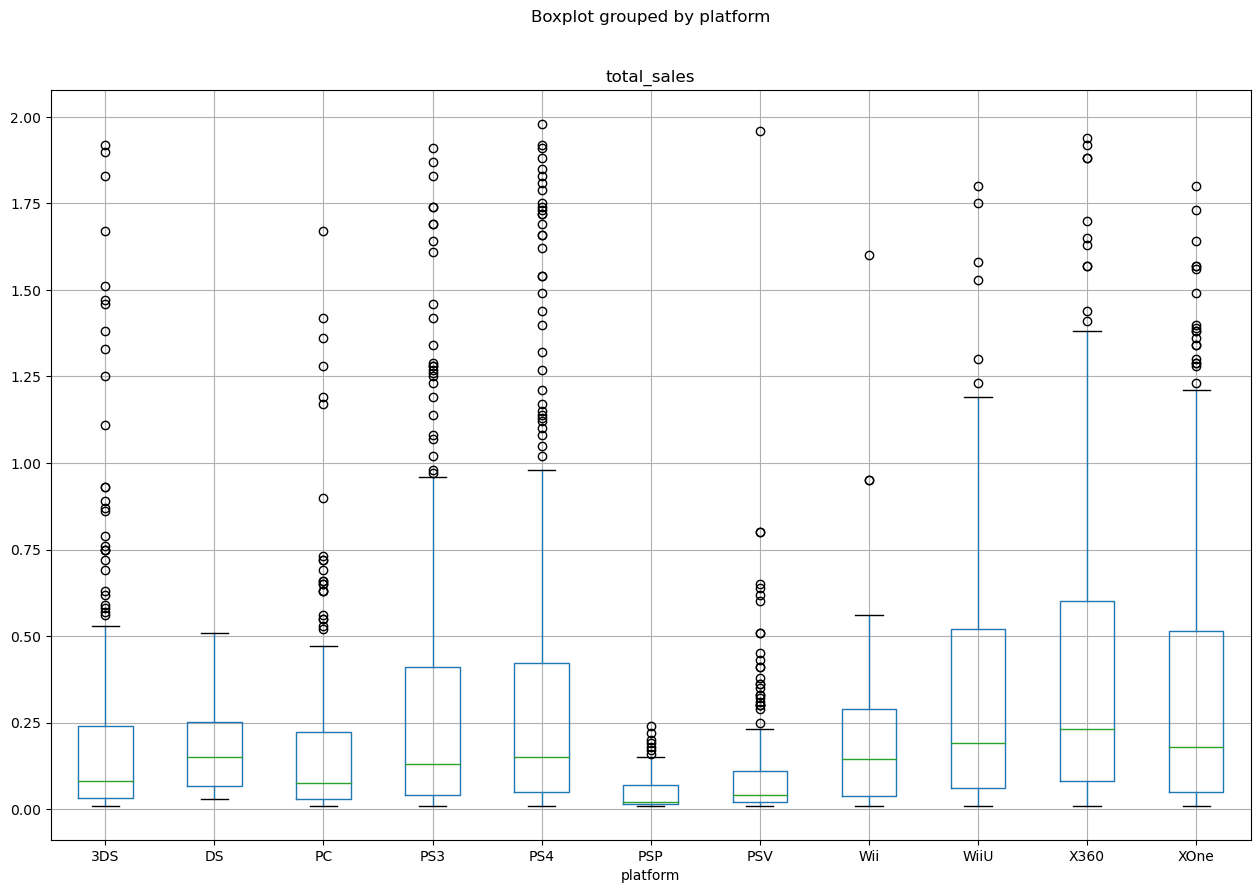

In [47]:
data_actual.query('total_sales <= 2').boxplot(by = 'platform', column = 'total_sales', figsize=(15, 10))
plt.show()

Значения наиболее равномерно распределены у платформ DS и Wii. У остальных платформ большая часть значений больше медианного. 

Рассмотрим, как влияют отзывы пользователей и критиков на продажи для PS4.

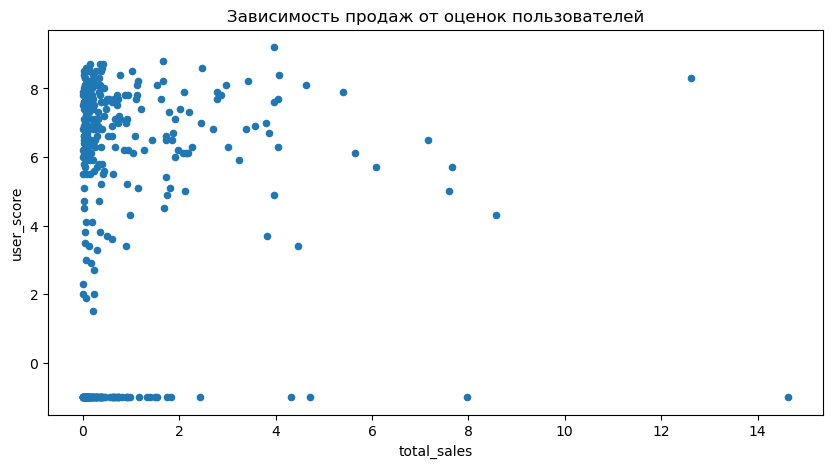

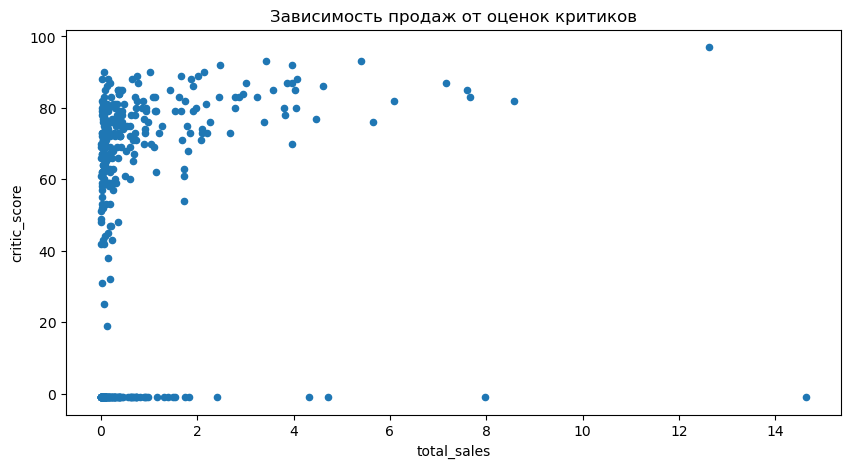

In [48]:
for i in ['PS4']:
    (data_actual[data_actual['platform'] == i]).plot(x='total_sales', y='user_score', title='Зависимость продаж от оценок пользователей', kind='scatter', figsize=(10, 5))
    (data_actual[data_actual['platform'] == i]).plot(x='total_sales', y='critic_score', title='Зависимость продаж от оценок критиков', kind='scatter', figsize=(10, 5))
plt.show()

Судя по графикам зависимость между отценками критиков 'critic_score' и продажами больше.
Рассчитаем коэффициэнты корреляции.

In [49]:
ps4 = data_actual[data_actual['platform'] == 'PS4']

In [50]:
ps4[['total_sales', 'user_score', 'critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.115961,0.226526
user_score,0.115961,1.000000,0.907449
critic_score,0.226526,0.907449,1.000000


Линейной зависимости между между оценкой пользователей и продажами нет, так как коэффициент корреляции очень маленький и равен -0,065. Продажи в некоторой степени зависят от оценок критиков. Коэффициент корреляции составляет 0,35, поэтому нельзя сказать, что оценки критиков оказываю очень сильное влияние на продажи.

Предполагаю, что анналогичная ситуация будет и с корреляций для других платформ.

Рассмотрим распределение игр по жанрам и их влияние на продажи в зависимости от региона.

In [51]:
top_genre = data_actual.pivot_table(index = ['genre'], values = ['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc = ['sum'])

In [52]:
top_genre

sum                              
             eu_sales jp_sales na_sales total_sales
genre                                              
Action         118.13    40.49   126.05      321.87
Adventure        8.25     5.82     7.14       23.64
Fighting         8.55     7.65    15.55       35.31
Misc            20.04     9.20    27.49       62.82
Platform        15.58     4.79    18.14       42.63
Puzzle           1.00     1.18     0.83        3.17
Racing          20.19     2.30    12.96       39.89
Role-Playing    36.97    51.04    46.40      145.89
Shooter         87.86     6.61   109.74      232.98
Simulation      10.92     4.52     4.86       21.76
Sports          60.52     5.41    65.27      150.65
Strategy         4.22     1.77     3.28       10.08

In [53]:
top_genre.columns = ['na_sales','eu_sales', 'jp_sales', 'total_sales']

Выделим пять лидирующих жанра по суммарным продажам и продажам в различных регионах

In [54]:
top5_genre_total = top_genre.sort_values(by = 'total_sales', ascending = False).index[:5]
top5_genre_na = top_genre.sort_values(by = 'na_sales', ascending = False).index[:5]
top5_genre_eu = top_genre.sort_values(by = 'eu_sales', ascending = False).index[:5]
top5_genre_jp = top_genre.sort_values(by = 'jp_sales', ascending = False).index[:5]

In [55]:
print('Топ 5 самых популярных жанров по общим продажам:', *top5_genre_total)
print('Топ 5 самых популярных жанров по продажам в Северо-Американском регионе:', *top5_genre_na)
print('Топ 5 самых популярных жанров по продажам в Европейском регионе:', *top5_genre_eu)
print('Топ 5 самых популярных жанров по продажам в Японском регионе:', *top5_genre_jp)

Топ 5 самых популярных жанров по общим продажам: Action Shooter Sports Role-Playing Misc
Топ 5 самых популярных жанров по продажам в Северо-Американском регионе: Action Shooter Sports Role-Playing Racing
Топ 5 самых популярных жанров по продажам в Европейском регионе: Role-Playing Action Misc Fighting Shooter
Топ 5 самых популярных жанров по продажам в Японском регионе: Action Shooter Sports Role-Playing Misc


Самые популярные топ-5 жанров по общим продажам и продажам в Японском регионе полностью совпадают.
В Северо-Американском вместо Misc появляется Racing, а в Европейском Fighting вместо Sports.
Во всех трех регионах в топ-5 попали следующие жанры: Action, Shooter, Role-Playing

### 3. Составим портрет пользователя каждого региона (NA, EU, JP)

Посмотрим общие продажи по каждой платформе для каждого региона (NA, EU, JP)

In [56]:
top_platform = data_actual.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = ['sum'])
top_platform.columns = ['na_sales', 'eu_sales', 'jp_sales']
top_platform

,na_sales,eu_sales,jp_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSP,0.17,3.29,0.00
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21


Выделим топ 5 платформ для каждого региона и рассмотрим продажи в них.

In [57]:
platform_na = top_platform.sort_values(by='na_sales', ascending=False).head().loc[:, 'na_sales'] # топ5 для Северо-Американского региона

In [58]:
platform_eu = top_platform.sort_values(by='eu_sales', ascending=False).head().loc[:, 'eu_sales'] # топ5 для Европейскольго региона

In [59]:
platform_jp = top_platform.sort_values(by='jp_sales', ascending=False).head().loc[:, 'jp_sales'] # топ5 для Японии

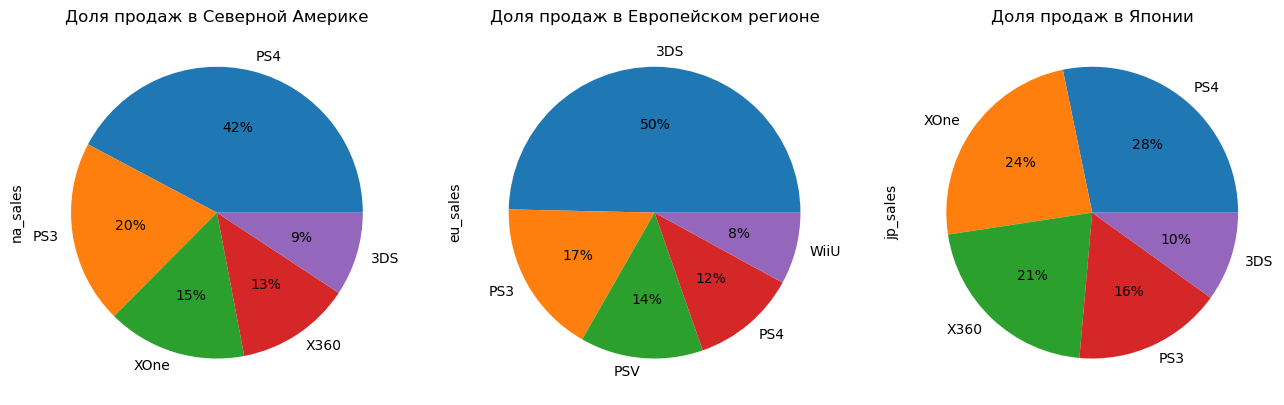

In [60]:
fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=3)
platform_na.plot(ax=axes[0], kind = 'pie', subplots=True, autopct='%1.0f%%', legend = False)
axes[0].set_title('Доля продаж в Северной Америке')

platform_eu.plot(ax=axes[1], kind = 'pie', subplots=True, autopct='%1.0f%%', legend = False)
axes[1].set_title('Доля продаж в Европейском регионе')

platform_jp.plot(ax=axes[2], kind = 'pie', subplots=True, autopct='%1.0f%%', legend = False)
axes[2].set_title('Доля продаж в Японии')

plt.show()

**Вывод**

Как видно из графиков:
- PS4 лидер продаж в Северной Америке(42%) и в Японии(28%) при этом на Европейском рынке его доля всего 12%
- В Европейском регионе самая большая доля продаж у 3DS(52%), тогда как доля этой платформы минимальна в Северной Америке(9%) и Японии(10%)

In [61]:
genre_na = top_genre.sort_values(by='na_sales', ascending=False).head().loc[:, 'na_sales'] # топ5 жанров для Северо-Американского региона

In [62]:
genre_eu = top_genre.sort_values(by='eu_sales', ascending=False).head().loc[:, 'eu_sales'] # топ5 жанров для Европейского региона

In [63]:
genre_jp = top_genre.sort_values(by='jp_sales', ascending=False).head().loc[:, 'jp_sales'] # топ5 жанров для Японии

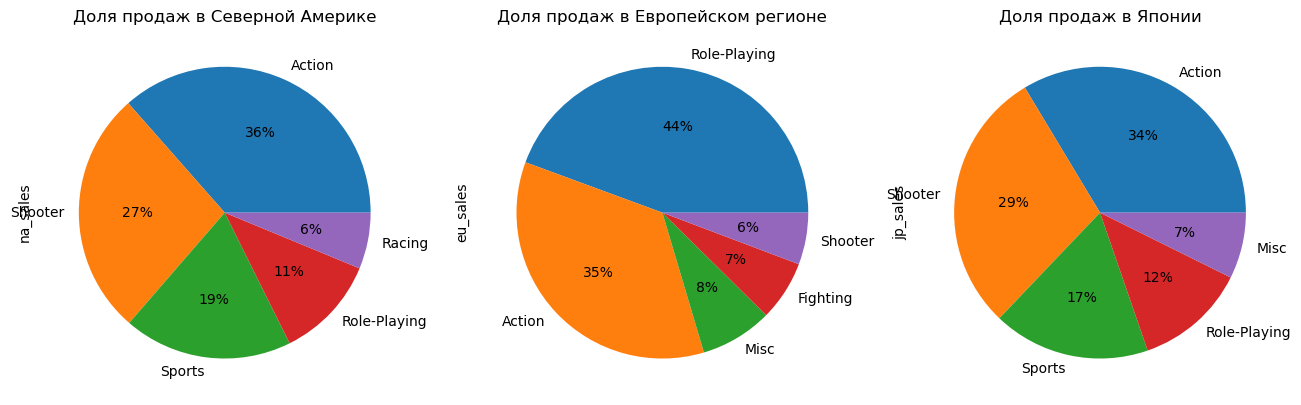

In [64]:
fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=3)
genre_na.plot(ax=axes[0], kind = 'pie', subplots=True, autopct='%1.0f%%', legend = False)
axes[0].set_title('Доля продаж в Северной Америке')

genre_eu.plot(ax=axes[1], kind = 'pie', subplots=True, autopct='%1.0f%%', legend = False)
axes[1].set_title('Доля продаж в Европейском регионе')

genre_jp.plot(ax=axes[2], kind = 'pie', subplots=True, autopct='%1.0f%%', legend = False)
axes[2].set_title('Доля продаж в Японии')

plt.show()

**Вывод**

Жанр 'Action' лидирует по продажам в Северной Америке(36%) и Японии(34%), в Европе он на втором месте, хотя доля достаточно высокая - 35%.
В Европе лидером является 'Role-Playing' - 44%, при этом этот жанр не попал в топ-5 в Северной Америке и Японии.
Втором месте а Америке и Японии занимает 'Shooter' с долей 27% и 29%, соответственно, а в Европе он на последнем месте с долей 6%.
В Америке на последнем месте - 'Rasing'(6%), а в Японии - 'Misc'(7%)
Таким образом во всех трех регионов на топ-2 приходиться более 70% продаж, соответсявенно на остальные три жанра менее 30%.

Рассмотрим влияние рейтинга ESRB на продажи в отдельном регионе

In [65]:
esrb_table = data_actual.pivot_table(index = ['rating'], values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])

In [66]:
esrb_table

sum                  
        eu_sales jp_sales na_sales
rating                            
E          83.36    15.14    79.05
E10+       42.69     5.89    54.24
M         145.32    14.11   165.21
T          41.95    20.59    49.79
unknown    78.91    85.05    89.42

**Вывод**

Мы можем наблюдать определенные закономерности между рейтингом ESRB и продажами в определенном регионе.
Так игры с рейтингом E имеют выше продажи в Европе и Северной Америке и достаточно низкие в Японии. Аналогичная ситуация с рейтингом М.
Достаточно высокие продажи по всем трем регионам у игр с неизвестным рейтингом.

### 4. Проверка гипотез

**Гипотеза 1**

- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Альтернативная гипотеза : Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [67]:
from scipy import stats as st

alpha = 0.05

result_first = st.ttest_ind(data_actual.query('(platform == "XOne") and (user_score != -1)')['user_score'],
                            data_actual.query('(platform == "PC") and (user_score != -1)')['user_score'])

print('р-значение: ', result_first.pvalue)
if result_first.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Тест показал, что нулевую гипотезу не можем отвергнуть. Значит средние пользовательские рейтинги платформ Xbox One и PC схожи.

**Гипотеза 2**

- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые

- Альтернативна гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [68]:
alpha = 0.05

result_second = st.ttest_ind(data_actual.query('(genre == "Action") and (user_score != -1)')['user_score'],
                             data_actual.query('(genre == "Sports") and (user_score != -1)')['user_score'])


print('р-значение: ', result_second.pvalue)
if result_second.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу


**Вывод**

Тест показал, что нулевая гипотеза не подтвердилась. Значит средние пользовательские рейтинги жанров Action и Sports разные.

### Общие выводы

На основании проведенного анализа, можем сделать следующие выводы:
- В среднем платформы живут от 10 до 12 лет, а новые платформы появляются каждые 5-7 лет.
- Актуальным периодом является период с 2013 по 2016 год
- Наиболее перспективной платформой может являтся PS4
- Оценка пользователей не оказывает существенного влияния на продажи
- Оценка критиков оказывает небольшое влияние на продажи

Топ 5 самых популярных жанров по продажам:
 - в Северо-Американском регионе: Action Shooter Sports Role-Playing Racing
 - в Европейском регионе: Role-Playing Action Misc Fighting Shooter
 - в Японском регионе: Action Shooter Sports Role-Playing Misc
 
Самыми популярными платформами стали:
 - в Северо-Американском регионе: PS4, PS3, XOne, X360, 3DS
 - в Европейском регионе: 3DS, PS3, PSV, PS4, WiiU
 - в Японском регионе: PS4, XOne, X360, PS3, 3DS
 
Самыми популярные жанры:
 - в Северо-Американском регионе: Action, Shooter, Sports, Role-Plaing, Racing
 - в Европейском регионе: Role-Plaing, Action, Misc, Fighting Shooter
 - в Японском регионе: Action, Shooter, Sports, Role-Plaing, Misc

Рейтинг ESRB влияет на продажи.

Также мы проверили гипотезы и определили:
 - средние пользовательские рейтинги платформ Xbox One и PC схожи
 - средние пользовательские рейтинги жанров Action и Sports различаются
 
Можем сделать вывод, что игра имеет больше шансов на успех, если она выходит на платформе PS4 и 3DS, а также относится к жанру Action.